In [2]:
from IPython.display import clear_output
from lazypredict.Supervised import LazyRegressor
from sklearn.model_selection import train_test_split
import lightgbm as lgb
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
from sklearn.ensemble import BaggingRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import ExtraTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt
import pandas as pd
import warnings

import sys
sys.path.append('../')

# Filtra todos os avisos do LightGBM
warnings.filterwarnings("ignore", category=UserWarning, message=".*lightgbm.*")

# Tratamento Inicial

In [3]:
with open('database/df.pkl', 'rb') as f:
    df = pd.read_pickle(f)
df.rename(columns={'year_month': 'date'}, inplace=True)
df['date'] = pd.to_datetime(df['date'])
df = df.set_index('date')
df = df.sort_index()
df = df.loc['2013-01-01':'2016-12-31']

In [4]:
df_item = df[df['item_nbr'] == 870938]

# Utilizando a biblioteca Lazypredict

In [5]:
def plot_forecast(ts, test, forecast):
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.plot(ts, label='Original')
    ax.plot(test.index, test, label='Teste', color='red', alpha=0.8)
    ax.plot(test.index, forecast, label='Previsão', color='orange', alpha=0.8, linestyle='--')
    ax.legend()
    return ax

In [6]:
# utilizando lazy prediction para df_item

df_item_ = df_item.copy()

X = df_item_[['year', 'month']]
y = df_item_['unit_sales']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

reg = LazyRegressor(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = reg.fit(X_train, X_test, y_train, y_test)

clear_output()
models.head(5)

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
GradientBoostingRegressor,0.87,0.90,33.28,0.05
ExtraTreeRegressor,0.84,0.87,37.02,0.00
RandomForestRegressor,0.82,0.86,39.14,0.09
BaggingRegressor,0.80,0.84,40.96,0.03
XGBRegressor,0.77,0.82,44.14,0.06


MSE: 2772.399698226984


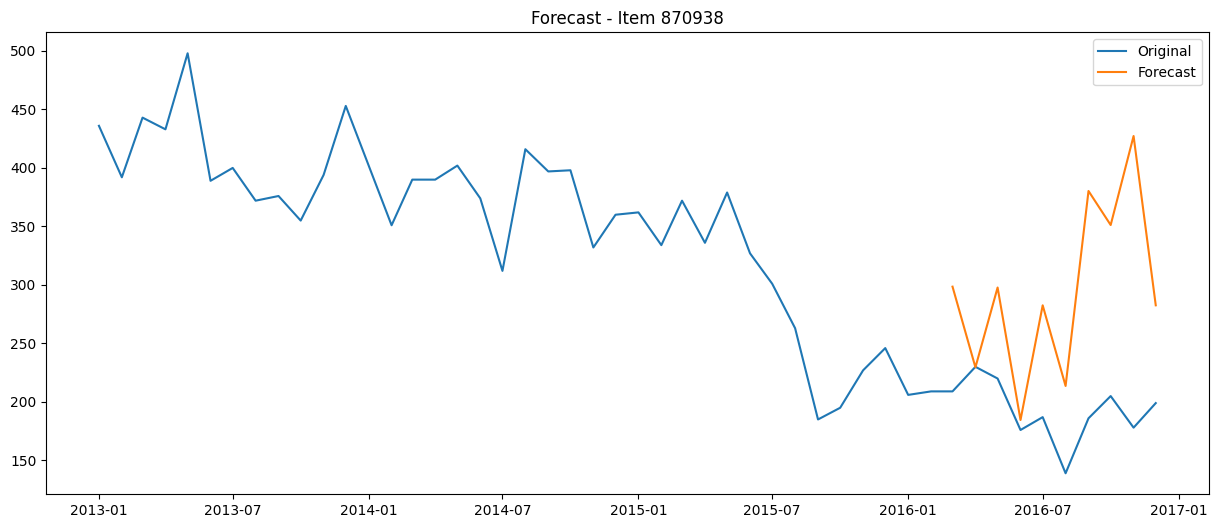

In [7]:
# utilizando GradientBoostingRegressor

model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=1, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'MSE: {mse}')

# plotando o forecast
plt.figure(figsize=(15, 6))
plt.plot(df_item['unit_sales'], label='Original')
plt.plot(df_item.index[-len(y_pred):], y_pred, label='Forecast')
plt.legend()
plt.title('Forecast - Item 870938')
plt.show()

MSE: 2426.7


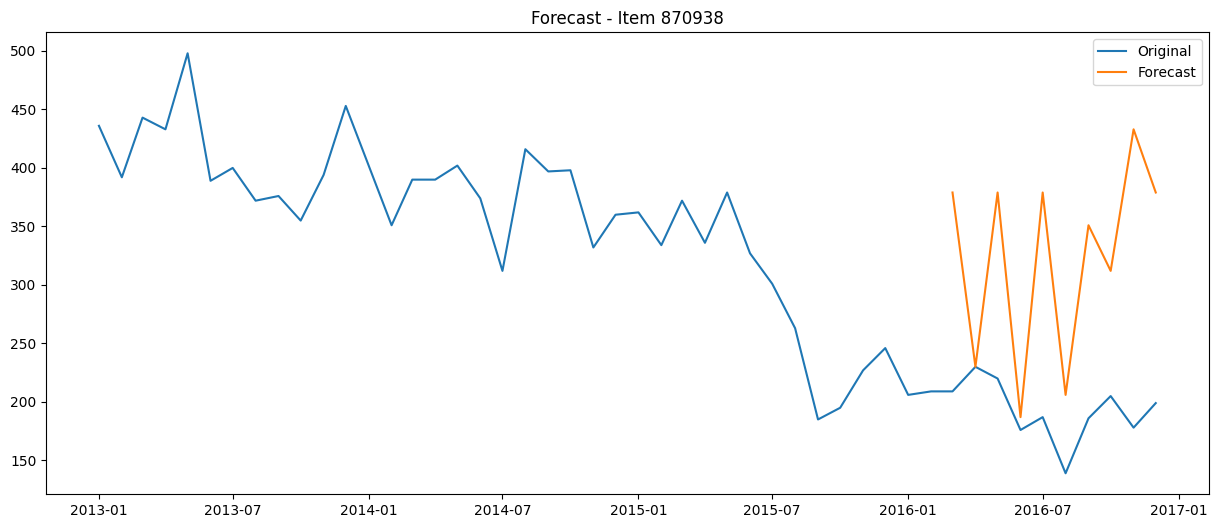

In [8]:
# utilizando DecisionTreeRegressor
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'MSE: {mse}')

# plotando o forecast
plt.figure(figsize=(15, 6))
plt.plot(df_item['unit_sales'], label='Original')
plt.plot(df_item.index[-len(y_pred):], y_pred, label='Forecast')
plt.legend()
plt.title('Forecast - Item 870938')
plt.show()

MSE: 1370.8


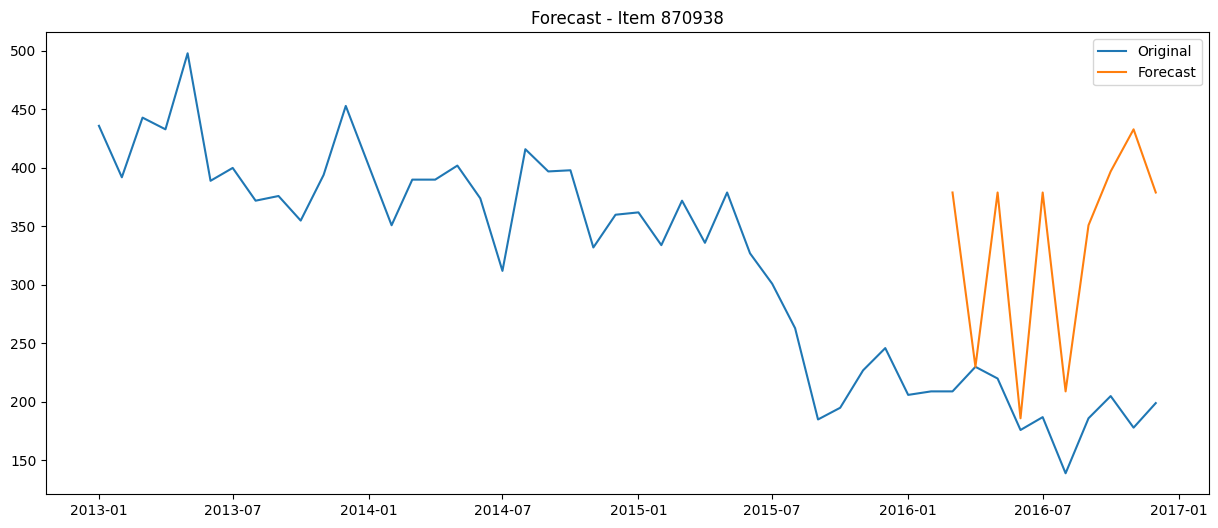

In [9]:
# utilizando ExtraTreeRegressor
model = ExtraTreeRegressor(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'MSE: {mse}')

# plotando o forecast
plt.figure(figsize=(15, 6))
plt.plot(df_item['unit_sales'], label='Original')
plt.plot(df_item.index[-len(y_pred):], y_pred, label='Forecast')
plt.legend()
plt.title('Forecast - Item 870938')
plt.show()